<a href="https://colab.research.google.com/github/anirbansen3027/feature-engineering/blob/master/date_and_time_variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dates and Times**

A special type of categorical variable are those that instead of taking traditional labels, like color (blue, red), or city (London, Manchester), take dates as values. For example, date of birth ('29-08-1987', '12-01-2012'), or time of application ('2016-Dec', '2013-March').

Datetime variables can contain dates only, or time only, or date and time.

Typically, we would never work with a date variable as a categorical variable, for a variety of reasons:


*   Date variables usually contain a huge number of individual categories, which will expand the feature space dramatically
*   Date variables allow us to capture much more information from the dataset if preprocessed in the right way



In [0]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Colab's file access feature
from google.colab import files
#retrieve uploaded file
uploaded = files.upload()
#move kaggle.json into the file where the api expects it to be there
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


**About the dataset:**

Lending Club Loan Data : Analyze Lending Club's issued loans (https://www.kaggle.com/wendykan/lending-club-loan-data)

These files contain complete loan data for all loans issued through the 2007-2015, including the current loan status (Current, Late, Fully Paid, etc.) and latest payment information. The file containing loan data through the "present" contains complete loan data for all loans issued through the previous completed calendar quarter. Additional features include credit scores, number of finance inquiries, address including zip codes, and state, and collections among others. The file is a matrix of about 890 thousand observations and 75 variables. A data dictionary is provided in a separate file.

In [3]:
!kaggle datasets download -d wendykan/lending-club-loan-data

100% 240M/240M [00:03<00:00, 78.5MB/s]



In [4]:
!ls
!unzip 'lending-club-loan-data.zip'
!ls

lending-club-loan-data.zip  sample_data
Archive:  lending-club-loan-data.zip
  inflating: LCDataDictionary.xlsx   
  inflating: database.sqlite         
  inflating: loan.csv                
database.sqlite        lending-club-loan-data.zip  sample_data
LCDataDictionary.xlsx  loan.csv


In [5]:
# let's load the Lending Club dataset with a few selected columns

use_cols = ['loan_amnt', 'grade', 'purpose', 'issue_d', 'last_pymnt_d']

data = pd.read_csv('loan.csv', usecols=use_cols)

data.head()

,loan_amnt,grade,issue_d,purpose,last_pymnt_d
0,5000.0,B,Dec-2011,credit_card,Jan-2015
1,2500.0,C,Dec-2011,car,Apr-2013
2,2400.0,C,Dec-2011,small_business,Jun-2014
3,10000.0,C,Dec-2011,other,Jan-2015
4,3000.0,B,Dec-2011,other,Jan-2016


In [6]:
data.dtypes

loan_amnt       float64
grade            object
issue_d          object
purpose          object
last_pymnt_d     object
dtype: object

In [8]:
# now let's parse the dates, currently coded as strings, into datetime format
# this will allow us to make some analysis afterwards
data['last_pymnt_dt'] = pd.to_datetime(data.last_pymnt_d)
data['issue_dt'] = pd.to_datetime(data.issue_d)
data.head()

,loan_amnt,grade,issue_d,purpose,last_pymnt_d,last_pymnt_dt,issue_dt
0,5000.0,B,Dec-2011,credit_card,Jan-2015,2015-01-01,2011-12-01
1,2500.0,C,Dec-2011,car,Apr-2013,2013-04-01,2011-12-01
2,2400.0,C,Dec-2011,small_business,Jun-2014,2014-06-01,2011-12-01
3,10000.0,C,Dec-2011,other,Jan-2015,2015-01-01,2011-12-01
4,3000.0,B,Dec-2011,other,Jan-2016,2016-01-01,2011-12-01


Text(0, 0.5, 'Disbursed Amount(US Dollars)')

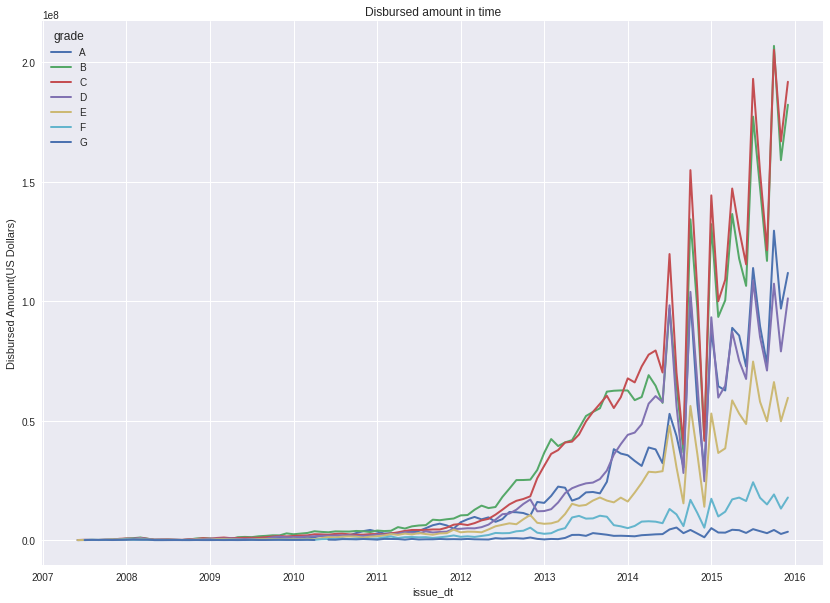

In [12]:
# let's see how much money Lending Club has disbursed
# (i.e., lent) over the years to the different risk
# markets (grade variable)

fig = data.groupby(['issue_dt', 'grade'])['loan_amnt'].sum().unstack().plot(
    figsize=(14, 10), linewidth=2)
fig.set_title('Disbursed amount in time')
fig.set_ylabel('Disbursed Amount(US Dollars)')

We can see that their major business comes from lending money to C and B grades.

'A' grades are the lower risk borrowers, this is borrowers that most likely will be able to repay their loans, as they are typically in a better financial situation. Borrowers within this grade are typically charged lower interest rates.

E, F and G grades represent the riskier borrowers. Usually borrowers in somewhat tighter financial situations, or for whom there is not sufficient financial history to make a reliable credit assessment. They are typically charged higher rates, as the business, and therefore the investors, take a higher risk when lending them money.